In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline
import seaborn as sns

# Load the wholesale customers dataset
data = pd.read_csv("C:\\Users\\PUNEET SINGH\\Wholesale.csv")
data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    

In [2]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [3]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
#### checking the null values of the dataset
data.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

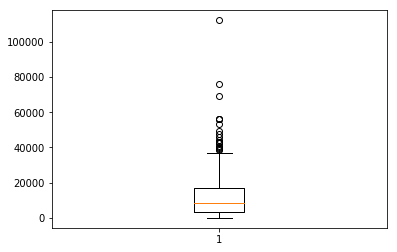

In [5]:
# checking the outliers in the data
import matplotlib.pyplot as plt
plt.boxplot(data['Fresh'])
plt.show()

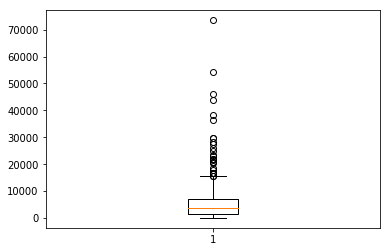

In [6]:
plt.boxplot(data['Milk'])
plt.show()

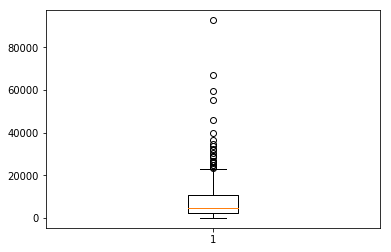

In [7]:
plt.boxplot(data['Grocery'])
plt.show()

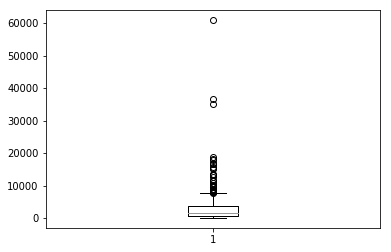

In [8]:
plt.boxplot(data['Frozen'])
plt.show()

In [9]:
# checking the outliers through z score
# importing the library
from scipy.stats import zscore

In [10]:
z = np.abs(zscore(data))
z

array([[0.05293319, 0.52356777, 0.04111489, 0.58936716, 0.04356873,
        0.06633906],
       [0.39130197, 0.54445767, 0.17031835, 0.27013618, 0.08640684,
        0.08915105],
       [0.44702926, 0.40853771, 0.0281571 , 0.13753572, 0.13323164,
        2.24329255],
       ...,
       [0.20032554, 1.31467078, 2.34838631, 0.54337975, 2.51121768,
        0.12145607],
       [0.13538389, 0.51753572, 0.60251388, 0.41944059, 0.56977032,
        0.21304614],
       [0.72930698, 0.5559243 , 0.57322717, 0.62009417, 0.50488752,
        0.52286938]])

In [11]:
threshold = 3
print(np.where(z>3))

(array([ 23,  23,  39,  47,  47,  47,  56,  56,  61,  61,  61,  65,  65,
        71,  85,  85,  85,  86,  86,  87,  92,  93, 103, 103, 125, 181,
       181, 183, 183, 183, 196, 211, 211, 211, 216, 251, 258, 259, 284,
       325, 333, 333, 413], dtype=int64), array([1, 5, 0, 1, 2, 4, 1, 4, 1, 2, 4, 2, 4, 5, 1, 2, 4, 1, 4, 5, 4, 3,
       0, 3, 0, 0, 1, 1, 3, 5, 3, 1, 2, 4, 2, 4, 0, 0, 0, 3, 2, 4, 3],
      dtype=int64))


In [12]:
# removing the outliers of the data 
data_new = data[(z<3).all(axis=1)]
data_new.shape

(414, 6)

In [13]:
# importing the library
import seaborn as sns

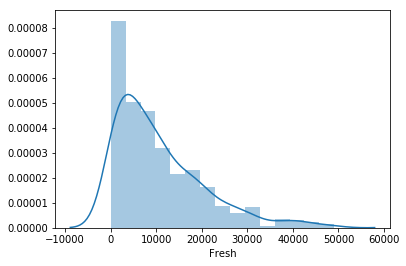

In [14]:
sns.distplot(data_new['Fresh'])
plt.show()   

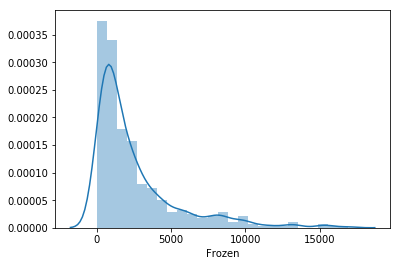

In [15]:
sns.distplot(data_new['Frozen'])
plt.show()   

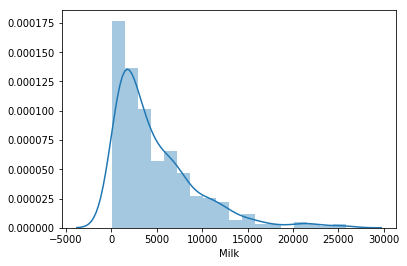

In [16]:
sns.distplot(data_new['Milk'])
plt.show()   

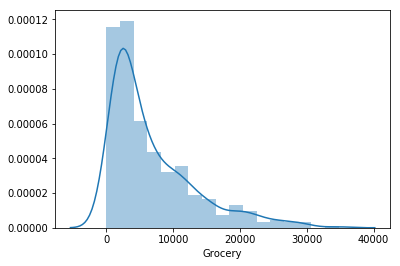

In [17]:
sns.distplot(data_new['Grocery'])
plt.show()   

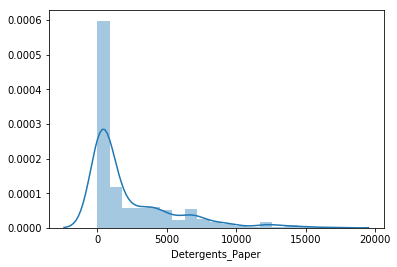

In [18]:
sns.distplot(data_new['Detergents_Paper'])
plt.show()   

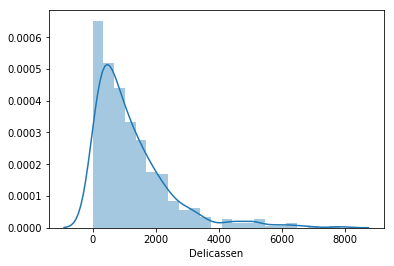

In [19]:
sns.distplot(data_new['Delicassen'])
plt.show()   

featurs of the data are highly skewed . 

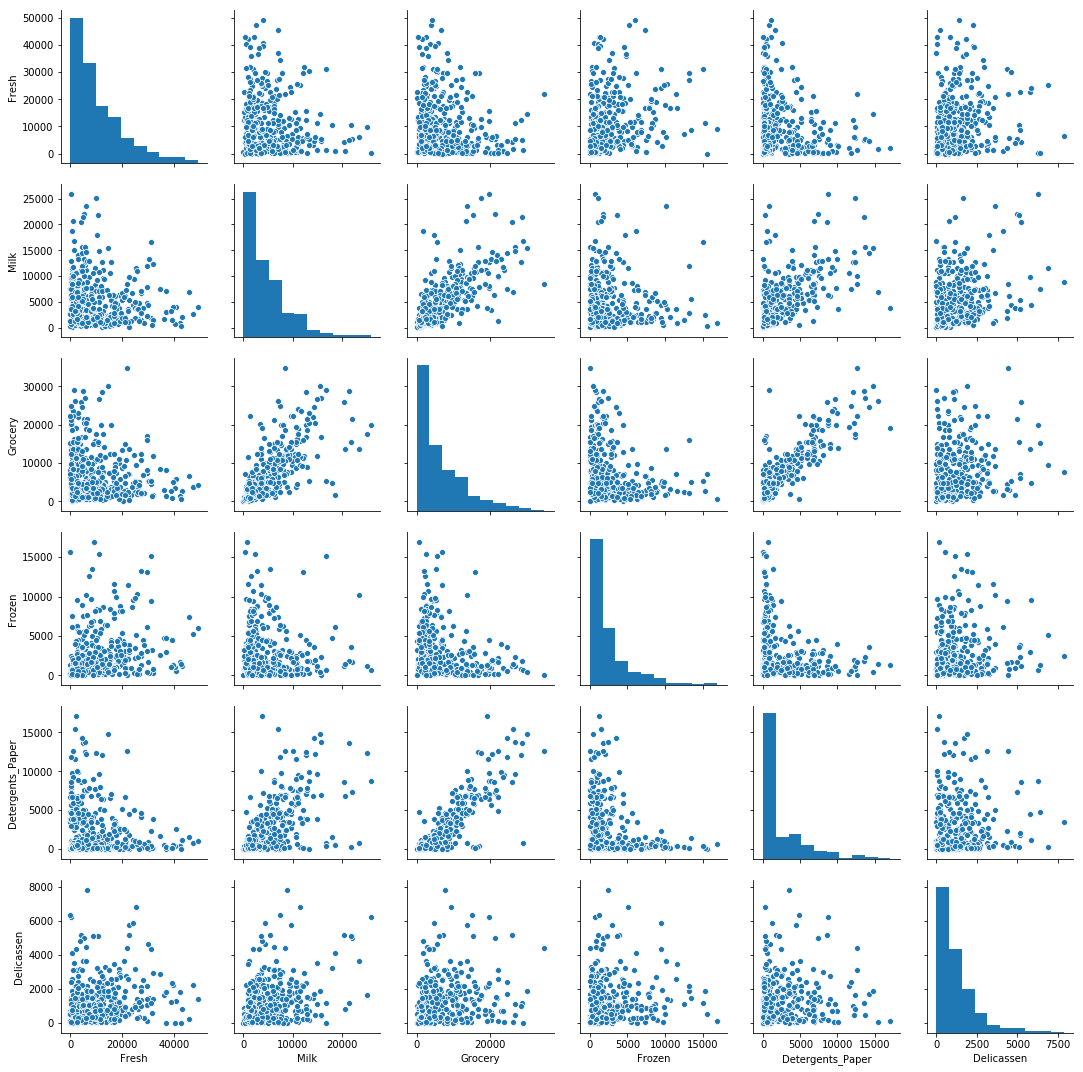

In [20]:
sns.pairplot(data_new)
plt.show()

In [21]:
cnames = ["Fresh","Milk","Grocery","Detergents_Paper","Delicassen"]

In [22]:
#Nomalisation
for i in cnames:
    print(i)
    data_new[i] = (data_new[i] - min(data_new[i]))/(max(data_new[i]) - min(data_new[i]))

Fresh
Milk
Grocery
Detergents_Paper
Delicassen


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


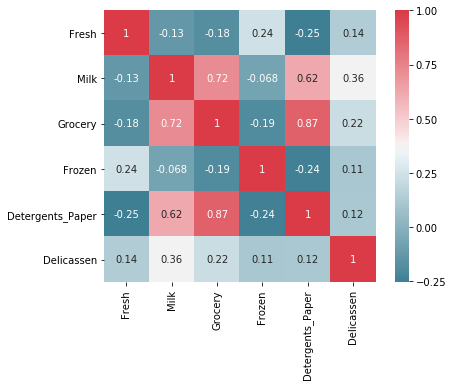

In [23]:
# finding the correlation between the continous variables
f,ax = plt.subplots(figsize=(7,5))
corr=data_new.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot = True)
plt.show()

In [24]:
# Imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
#Load required libraries
from sklearn.cluster import KMeans

#Estimate optimum number of clusters
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters).fit(data_new.iloc[:,0:5])
    cluster_errors.append(clusters.inertia_)
    
#Create dataframe with cluster errors
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

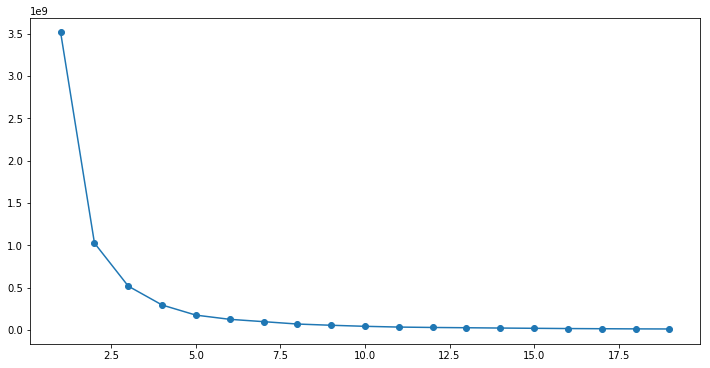

In [26]:
#Plot line chart to visualise number of clusters
%matplotlib inline  
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [27]:
#Implement kmeans
kmeans_model = KMeans(n_clusters = 3).fit(data_new.iloc[:,0:5])

In [28]:
#Summarize output
pd.crosstab(data_new['Frozen'], kmeans_model.labels_)

col_0,0,1,2
Frozen,,,
25,1,0,0
33,1,0,0
38,1,0,0
42,1,0,0
47,1,0,0
52,1,0,0
61,1,0,0
65,1,0,0
74,1,0,0
